In [209]:
#-------------------------------#
#           Libraries           #
#-------------------------------#
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

import matplotlib.pyplot as plt
import itertools

In [210]:
df = pd.read_csv('news.csv')

In [211]:
#Get shape and head
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [212]:
## Get the Independent Features

X=df.drop('label',axis=1)

In [213]:
X.head()

,Unnamed: 0,title,text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...


In [214]:
## Get the Dependent features
y=df['label']

In [215]:
y.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [216]:
df.shape

(6335, 4)

In [217]:
df=df.dropna()

In [218]:
df.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [219]:
messages=df.copy()

In [220]:
messages.reset_index(inplace=True)

In [221]:
messages.head(10)

,index,Unnamed: 0,title,text,label
0,0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [222]:
messages['title'][6]

&#39;Girl Horrified At What She Watches Boyfriend Do After He Left FaceTime On&#39;

In [223]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [224]:
corpus[3]

&#39;berni support twitter erupt anger dnc tri warn&#39;

In [225]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [226]:
X.shape

(6335, 5000)

In [227]:
y=messages['label']

In [228]:
## Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [229]:
cv.get_feature_names()[:20]

[&#39;abandon&#39;,
 &#39;abc&#39;,
 &#39;abc news&#39;,
 &#39;abdullah&#39;,
 &#39;abedin&#39;,
 &#39;abedin weiner&#39;,
 &#39;abedin weiner laptop&#39;,
 &#39;abil&#39;,
 &#39;aboard&#39;,
 &#39;abolish&#39;,
 &#39;abort&#39;,
 &#39;abort answer&#39;,
 &#39;absolut&#39;,
 &#39;abstain&#39;,
 &#39;abstain un&#39;,
 &#39;abstain un vote&#39;,
 &#39;absurd&#39;,
 &#39;abus&#39;,
 &#39;abus power&#39;,
 &#39;accept&#39;]

In [230]:
cv.get_params()

{&#39;analyzer&#39;: &#39;word&#39;,
 &#39;binary&#39;: False,
 &#39;decode_error&#39;: &#39;strict&#39;,
 &#39;dtype&#39;: numpy.int64,
 &#39;encoding&#39;: &#39;utf-8&#39;,
 &#39;input&#39;: &#39;content&#39;,
 &#39;lowercase&#39;: True,
 &#39;max_df&#39;: 1.0,
 &#39;max_features&#39;: 5000,
 &#39;min_df&#39;: 1,
 &#39;ngram_range&#39;: (1, 3),
 &#39;preprocessor&#39;: None,
 &#39;stop_words&#39;: None,
 &#39;strip_accents&#39;: None,
 &#39;token_pattern&#39;: &#39;(?u)\\b\\w\\w+\\b&#39;,
 &#39;tokenizer&#39;: None,
 &#39;vocabulary&#39;: None}

In [231]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [232]:
count_df.head()

,abandon,abc,abc news,abdullah,abedin,abedin weiner,abedin weiner laptop,abil,aboard,abolish,...,zika scaremong,zika scaremong washington,zika viru,zika viru caus,zika viru harmless,zionist,zionist stoog,zone,zuckerberg,zuess
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [233]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [234]:
#-------------------------------#
# Using MultinomialNB Algorithm #
#-------------------------------#
classifier=MultinomialNB()

accuracy:   0.818
Confusion matrix, without normalization


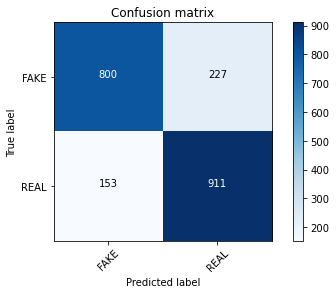

In [235]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [236]:
#----------#
# Accuracy #
#----------#
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.8182687709230033

In [237]:
y_train.shape

(4244,)